<a href="https://colab.research.google.com/github/Hanbi-Kim/Git-Test/blob/main/%08AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt

In [2]:
# 데이터 로드 (깃허브에 올려서 로드했습니다.. 만약에 코랩에서 다른 데이터 로드해서 하시려면 업로드하고 경로를 여기에 쓰시면 됩니다.)
df = pd.read_csv("https://raw.githubusercontent.com/Hanbi-Kim/Git-Test/main/health_data_with_header_2.csv")

In [3]:
# 로드된 데이터 앞 5개 확인
df.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,num
0,39,138,220,152,0.0,0,0,3,0,0,0,2,3,0
1,60,150,240,171,0.9,0,0,1,0,0,0,1,3,0
2,69,140,239,151,1.8,2,0,1,0,0,0,1,3,0
3,58,120,284,160,1.8,0,1,2,0,2,0,2,3,1
4,47,130,253,179,0.0,0,1,3,0,0,0,1,3,0


In [4]:
# 불러온 데이터 기초통계량 확인
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.676768,3.158249,0.144781,0.996633,0.326599,1.602694,4.730640,0.461279
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,0.468500,0.964859,0.352474,0.994914,0.469761,0.618187,1.938629,0.499340
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,7.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000


In [5]:
# num == 1인 데이터는 비정상 데이터임으로 df_abnormal에 할당
df_abnormal = df[df['num'] ==  1]

In [6]:
# num == 0인 데이터는 정상 데이터임으로 df_normal에 할당
df_normal = df[df['num'] ==  0]

In [7]:
# df_normal 데이터를 훈련과 테스트용으로 95:5 비율로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test_normal, y_train, y_test = train_test_split(df_normal.drop('num',axis=1), df_normal['num'],
                                                    test_size=0.05, random_state=42)

In [8]:
# 훈련에 사용할 데이터
X_train.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
200,44,120,263,173,0.0,0,1,2,0,0,0,1,7
266,35,122,192,174,0.0,0,1,2,0,0,0,1,3
44,48,130,275,139,0.2,0,0,3,0,0,0,1,3
177,43,110,211,161,0.0,0,1,4,0,0,0,1,7
36,54,150,232,165,1.6,0,1,3,0,2,0,1,7


In [31]:
# 테스트에 사용할 정상 데이터
X_test_normal.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,MAE,Result
209,52,108,233,147,0.1,3,1,4,1,0,0,1,7,2.951198,Normal
215,65,140,417,157,0.8,1,0,3,1,2,0,1,3,14.748884,Normal
265,54,140,239,160,1.2,0,1,4,0,0,0,1,3,2.445960,Normal
124,48,122,222,186,0.0,0,1,4,0,2,0,1,3,5.395887,Normal
193,48,124,255,175,0.0,2,1,3,1,0,0,1,3,3.020137,Normal


In [ ]:
X_train.shape

In [17]:
model = keras.Sequential(
    [
        layers.Input(shape= X_train.shape[1]),
        layers.Dense(128, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(X_train.shape[1], activation='relu')
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 13)                1677      
                                                                 
Total params: 12373 (48.33 KB)
Trainable params: 12373 (

In [18]:
history = model.fit(
    X_train,
    X_train,
    epochs=5000,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min")
    ],
)

Epoch 1/5000
2/2 [==============================] - 1s 239ms/step - loss: 7735.0522 - val_loss: 8489.2988
Epoch 2/5000
2/2 [==============================] - 0s 34ms/step - loss: 7730.6680 - val_loss: 8485.1230
Epoch 3/5000
2/2 [==============================] - 0s 33ms/step - loss: 7726.3384 - val_loss: 8480.9736
Epoch 4/5000
2/2 [==============================] - 0s 31ms/step - loss: 7722.0884 - val_loss: 8476.8369
Epoch 5/5000
2/2 [==============================] - 0s 35ms/step - loss: 7717.8887 - val_loss: 8472.7275
Epoch 6/5000
2/2 [==============================] - 0s 32ms/step - loss: 7713.7510 - val_loss: 8468.7197
Epoch 7/5000
2/2 [==============================] - 0s 39ms/step - loss: 7709.6538 - val_loss: 8464.7480
Epoch 8/5000
2/2 [==============================] - 0s 31ms/step - loss: 7705.6367 - val_loss: 8460.7939
Epoch 9/5000
2/2 [==============================] - 0s 35ms/step - loss: 7701.6772 - val_loss: 8456.8633
Epoch 10/5000
2/2 [==============================] - 0

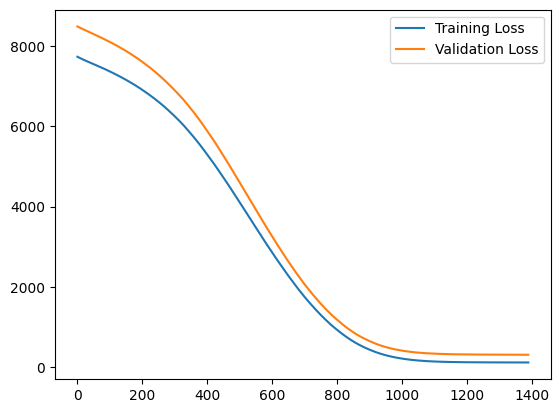

In [19]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


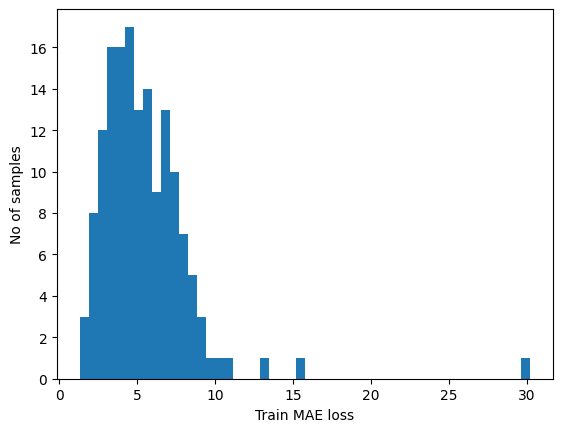

Reconstruction error threshold:  30.212218952178958


In [22]:
# Get train MAE loss.
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [23]:
# 정상 테스트 데이터
X_test_normal

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
209,52,108,233,147,0.1,3,1,4,1,0,0,1,7
215,65,140,417,157,0.8,1,0,3,1,2,0,1,3
265,54,140,239,160,1.2,0,1,4,0,0,0,1,3
124,48,122,222,186,0.0,0,1,4,0,2,0,1,3
193,48,124,255,175,0.0,2,1,3,1,0,0,1,3
68,69,160,234,131,0.1,1,1,1,1,2,0,2,3
201,51,130,256,149,0.5,0,0,3,0,2,0,1,3
119,71,112,149,125,1.6,0,0,4,0,0,0,2,3


In [24]:
# 정상 테스트 데이터의 예측 값
X_test_normal_pred = pd.DataFrame(model.predict(X_test_normal), columns=X_test_normal.columns)
X_test_normal_pred

1/1 [==============================] - 0s 29ms/step


,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,48.746086,117.513435,226.568039,144.933731,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,75.143875,168.982224,337.422852,217.231155,0.0,0.0,1.001096,0.0,0.0,0.000000,0.0,0.0,0.0
2,52.961845,130.693863,248.837723,158.584534,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,51.302505,127.303146,240.179825,153.548340,0.0,0.0,0.000000,0.0,0.0,0.090609,0.0,0.0,0.0
4,54.904022,132.623901,254.321991,162.944153,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5,50.958057,129.086197,244.566055,154.621109,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
6,53.452251,128.563370,248.162811,158.661514,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
7,35.893162,96.509193,176.862823,111.094666,0.0,0.0,0.000000,0.0,0.0,1.398464,0.0,0.0,0.0


In [25]:
# 정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_normal['MAE'] = np.mean(np.abs(X_test_normal_pred - X_test_normal.reset_index(drop=True)), axis=1).tolist()
X_test_normal['Result'] = X_test_normal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

In [26]:
# 비정상 테스트 데이터
df_abnormal
X_test_abnormal = df_abnormal.drop("num", axis=1)
X_test_abnormal

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
3,58,120,284,160,1.8,0,1,2,0,2,0,2,3
5,50,140,233,163,0.6,1,1,3,0,0,0,2,7
6,61,145,307,146,1.0,0,0,4,0,2,1,2,7
8,70,160,269,112,2.9,1,1,3,0,0,1,2,7
9,66,112,212,132,0.1,1,1,4,0,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,144,193,141,3.4,2,1,4,1,0,0,2,7
289,60,158,305,161,0.0,0,0,4,0,2,0,1,3
291,67,100,299,125,0.9,2,1,4,0,2,1,2,3
292,57,140,241,123,0.2,0,0,4,0,0,1,2,7


In [27]:
# 정상 테스트 데이터의 예측 값
X_test_abnormal_pred = pd.DataFrame(model.predict(X_test_abnormal), columns=X_test_abnormal.columns)
X_test_abnormal_pred

5/5 [==============================] - 0s 4ms/step


,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,56.674183,134.724380,261.890503,167.757156,0.0,0.0,0.034644,0.0,0.0,0.000,0.0,0.0,0.0
1,52.545174,130.089066,247.033051,157.479172,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0
2,60.799519,144.300446,281.523956,180.095535,0.0,0.0,0.365708,0.0,0.0,0.000,0.0,0.0,0.0
3,54.409817,132.978378,257.567902,163.326431,0.0,0.0,0.585127,0.0,0.0,0.000,0.0,0.0,0.0
4,44.903172,110.873436,212.456558,134.956940,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,45.478580,119.181862,220.608719,139.585815,0.0,0.0,0.000000,0.0,0.0,0.954,0.0,0.0,0.0
133,62.705811,150.301346,291.067444,186.031219,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0
134,54.219753,125.576019,248.911255,159.328537,0.0,0.0,0.962073,0.0,0.0,0.000,0.0,0.0,0.0
135,50.454784,123.106255,237.237656,150.995560,0.0,0.0,0.127013,0.0,0.0,0.000,0.0,0.0,0.0


In [28]:
# 비정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_abnormal['MAE'] = np.mean(np.abs(X_test_abnormal_pred - X_test_abnormal.reset_index(drop=True)), axis=1).tolist()
X_test_abnormal['Result'] = X_test_abnormal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

# 최종 결과

In [29]:
# 정상 테스트 8개 중 8개를 정상으로 판단
X_test_normal['Result'].value_counts()

Normal    8
Name: Result, dtype: int64

In [30]:
# 비정상 테스트 137개 중 137개를 정상으로 판단
X_test_abnormal['Result'].value_counts()

Normal    137
Name: Result, dtype: int64

## 결과
- 정상/비정상에서 비정상을 모두 정상으로 판단하여 정확도가 매우 낮음

## 이후 추가할 수 있는 시도들
1. SMOTE등 샘플링 기법을 통한 데이터 증강으로 데이터 개수 증강
2. Normalization등 데이터 전처리 추가
3. Dense layer 구조 개선 및 dropout, BatchNorm등 추가

## 추가 코멘트
- 정형데이터에 오토인코더를 활용한 이상탐지 방법론에 대한 선행 연구 조사 부족, 선행 연구가 없다면 "오토인코더" "정형데이터분석" "이상탐지" 키워드에 대한 이해 필요
